In [29]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the data


games = pd.read_csv(r"C:\Users\Summe\ICE_Game_Forcast\games.csv")

# Dispalay the first few rows of the data

games.isnull().sum()
games.info()
display(games.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


# Initial overview of data

Data needs to be cleaned in the following ways

1. change to lower case. Python is case specific, keeping everything lowercase can prevent issues in code. 
2. make sure any spaces are changed to "_". Spaces need to be "_" for proper code usage, it can be difficult to see if any columns have a space in front or behind, so adding this will make it obvious for code usage later on.
3. correct Dtypes (i.e year_of_release -> Int64). This is done to prevent errors in Analysis later on.
4. there are several colums with missing data (remove/replace NaN values). This data could be missing due to the year_of_relese, many of the critic_score, user_score, and rating are on older games likely due to this information not being collected at the time. 
5. remove excess NaN value rows. This is to remove any rows that will not provide any significant information to our Analysis.
5. add an additional colum called "total_sales" since the goal of analysis is to determine which games are worth advertising.

In [30]:
# change to lower case

games.columns = games.columns.str.lower()

# check for spaces in the column names

games.columns = games.columns.str.replace(' ', '_')

display(games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [31]:

# correct Dtypes of the columns

games["year_of_release"] = games["year_of_release"].astype("Int64")

games["user_score"] = games["user_score"].replace("tbd", np.nan).astype(float)

# remove rows with too many missing values (more than 2)

games = games.dropna(thresh=len(games.columns) - 2)


# add a column for total sales

games["total_sales"] = games["na_sales"] + games["eu_sales"] + games["jp_sales"] + games["other_sales"]

games.info()
display(games.head())



<class 'pandas.core.frame.DataFrame'>
Index: 10021 entries, 0 to 16706
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             10021 non-null  object 
 1   platform         10021 non-null  object 
 2   year_of_release  9864 non-null   Int64  
 3   genre            10021 non-null  object 
 4   na_sales         10021 non-null  float64
 5   eu_sales         10021 non-null  float64
 6   jp_sales         10021 non-null  float64
 7   other_sales      10021 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7589 non-null   float64
 10  rating           9923 non-null   object 
 11  total_sales      10021 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.0+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


After cleaning, data is much easier to read.

1. converted to lower case for consistancy
2. updated dtypes for proper analysis
3. removed excessive NaN value rows since they won't contribute key information to later analysis
4. added a total_sales column


# Analysis guidlines

1. Look at how many games were released in different years. Is the data for every period significant?
2. Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?
3. Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a model for 2017.
4. Work only with the data that you've decided is relevant. Disregard the data for previous years.
5. Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.
6. Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.
7. Take a look at how user and professional reviews affect sales for one popular platform.
8. Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.
9. Keeping your conclusions in mind, compare the sales of the same games on other platforms.
10. Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

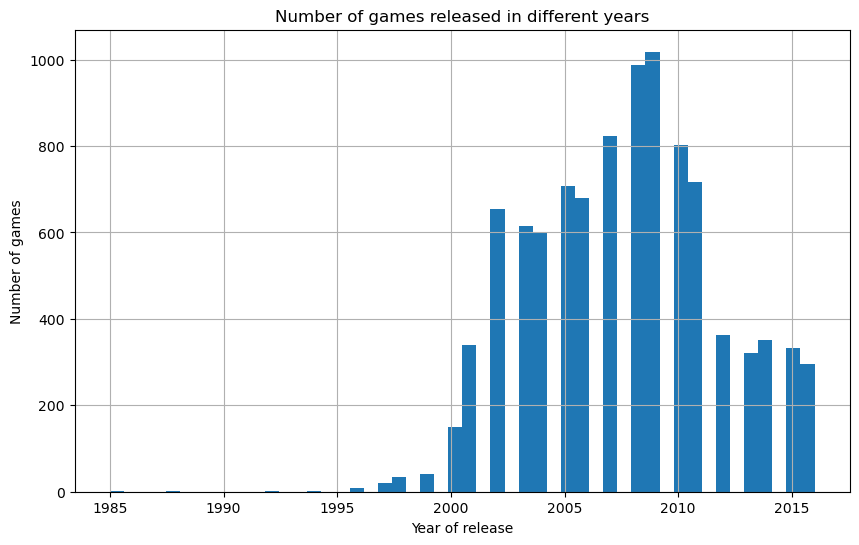

In [32]:
# Analyze the data

# Number of games released in different years

games["year_of_release"].hist(bins=50, figsize=(10, 6))
plt.title("Number of games released in different years")
plt.xlabel("Year of release")
plt.ylabel("Number of games")
plt.show()


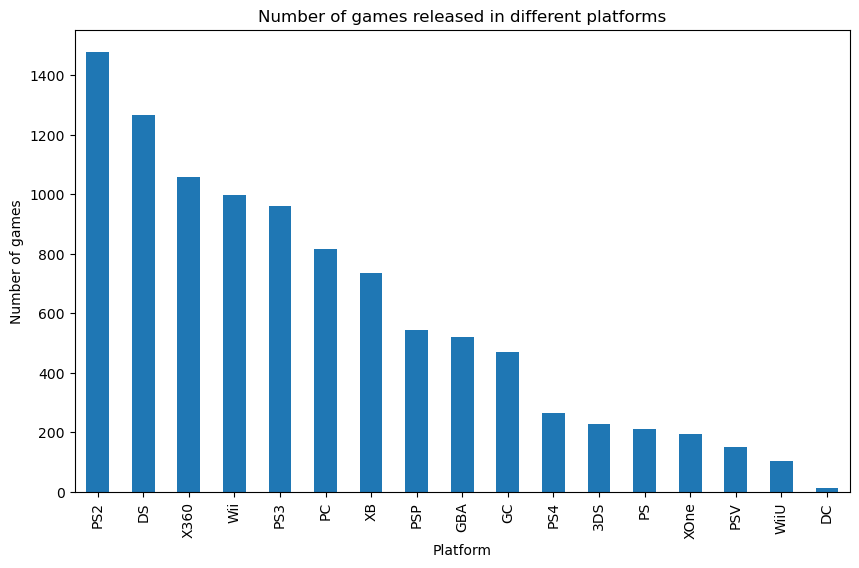

In [35]:
# Number of games released in different platforms

games["platform"].value_counts().plot(kind="bar", figsize=(10, 6))
plt.title("Number of games released in different platforms")
plt.xlabel("Platform")
plt.ylabel("Number of games")
plt.show()

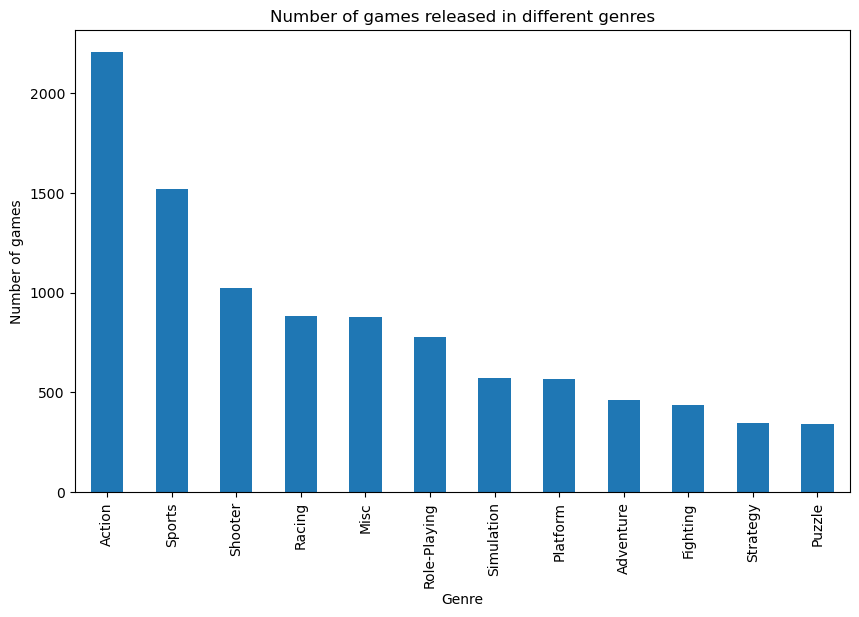

In [36]:
# Number of games released in different genres

games["genre"].value_counts().plot(kind="bar", figsize=(10, 6))
plt.title("Number of games released in different genres")
plt.xlabel("Genre")
plt.ylabel("Number of games")
plt.show()

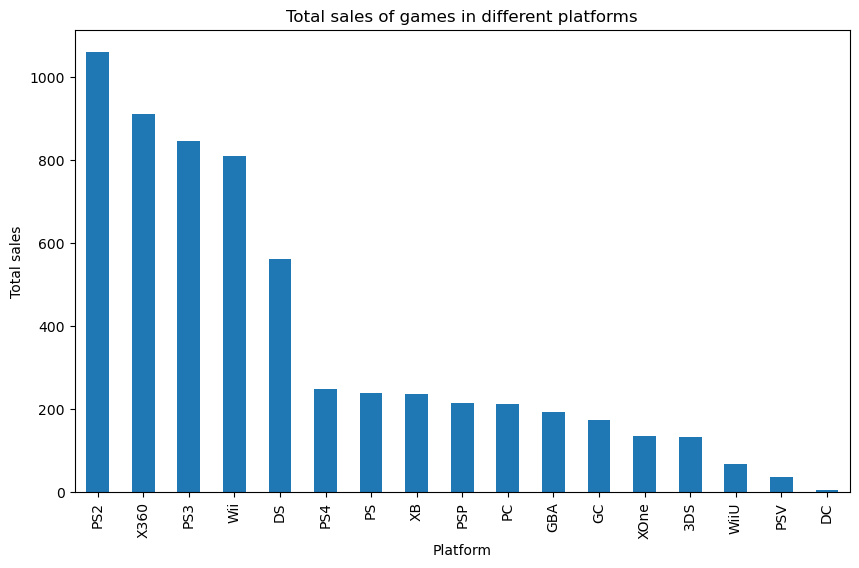

In [37]:
# Total sales of games in different platforms

platform_sales = games.groupby("platform")["total_sales"].sum().sort_values(ascending=False)
platform_sales.plot(kind="bar", figsize=(10, 6))
plt.title("Total sales of games in different platforms")
plt.xlabel("Platform")
plt.ylabel("Total sales")
plt.show()

In [ ]:
# 